In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [290]:
df = pd.read_csv('okcupid_profiles.csv')

In [291]:
df = df[[x for x in df.columns if not x.startswith('essay')]]
df.drop(columns=['speaks', 'location'], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [292]:
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,offspring,pets,religion,sign,smokes
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,2012-06-28-14-22,doesn't want kids,likes cats,NaN,pisces,no
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,NaN,likes dogs and likes cats,NaN,aquarius,no


In [293]:
# zmienic -1 w income na nan

In [294]:
df.dtypes

age              int64
status          object
sex             object
orientation     object
body_type       object
diet            object
drinks          object
drugs           object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
offspring       object
pets            object
religion        object
sign            object
smokes          object
dtype: object

In [295]:
categories_no_order = ['status', 'sex', 'orientation', 'body_type', 'diet', 
                       'education', 'ethnicity', 'job', 'location',
                       'offspring', 'pets', 'religion', 'sign', 'speaks']
categories_with_order = ['drinks', 'drugs', 'smokes']

In [296]:
offspring_mapping = {"doesn't have kids": 0,
                     "doesn't have kids, and doesn't want any": 0,
                     "doesn't have kids, but might want them": 0,
                     "doesn't have kids, but wants them": 0,
                     "doesn't want kids": 0,
                     "has a kid": 1,
                     "has a kid, and might want more": 1,
                     "has a kid, and wants more": 1,
                     "has a kid, and doesn't want more": 1,
                     "has kids": 1,
                     "has kids, and might want more": 1,
                     "has kids, and wants more": 1,
                     "has kids, but doesn't want more": 1,
                     "might want kids": 0,
                     "wants kids": 0}

In [297]:
education_mapping = {'college/university': 3,
                     'dropped out of college/university': 2,
                     'dropped out of high school': 1,
                     'dropped out of law school': 1,
                     'dropped out of masters program': 2,
                     'dropped out of med school': 2,
                     'dropped out of ph.d program': 3,
                     'dropped out of space camp': 2,
                     'dropped out of two-year college': 2,
                     'graduated from college/university': 3,
                     'graduated from high school': 2,
                     'graduated from law school': 2,
                     'graduated from masters program': 3,
                     'graduated from med school': 3,
                     'graduated from ph.d program': 3,
                     'graduated from space camp': 3,
                     'graduated from two-year college': 3,
                     'high school': 2,
                     'law school': 3,
                     'masters program': 3,
                     'med school': 3,
                     'ph.d program': 3,
                     'space camp': 3,
                     'two-year college':3,
                     'working on college/university': 2,
                     'working on high school': 1,
                     'working on law school': 2,
                     'working on masters program': 2,
                     'working on med school': 2,
                     'working on ph.d program': 3,
                     'working on space camp': 2,
                     'working on two-year college': 2
                     }

In [299]:
def create_values_set(ser):
  value_set = set()
  for val in list(ser):
    if type(val) == list:
      for subval in val:
        value_set.add(subval.strip())
  return value_set

In [298]:
df['ethnicity'] = df['ethnicity'].apply(lambda x: x.split(',') if type(x)==str else x)

In [300]:
ethnicity_set = create_values_set(df['ethnicity'])

In [267]:
df['religion'] = df['religion'].apply(lambda x: x.replace("and", "but") if type(x)==str else None)

In [268]:
df['religion'] = df['religion'].apply(lambda x: x.split(' but ') if type(x)==str else x)

In [269]:
religion_set = create_values_set(df['religion'])

In [270]:
df['sign'] = df['sign'].apply(lambda x: x.replace("and", "but") if type(x)==str else None)

In [271]:
df['pets'] = df['pets'].apply(lambda x: x.split(' and ') if type(x)==str else x)

In [301]:
pets_set = create_values_set(df['pets'])

In [273]:
df['sign'] = df['sign'].apply(lambda x: x.split(' but ') if type(x)==str else x)

In [302]:
signs_set = create_values_set(df['sign'])

In [303]:
df.replace({'education': education_mapping}, inplace=True)

In [304]:
df.replace({'offspring': offspring_mapping}, inplace=True)

In [305]:
df['body_type'] = df['body_type'].apply(lambda x: None if x=='rather not say' else x)

In [306]:
def one_hot_from_list(df, column, val_set):
  for val in list(val_set):
    val_column_name = f"{column}_{val}"
    df[val_column_name] = df[column].apply(lambda x: True if isinstance(x,list) and val in x else (False if isinstance(x,list) else None))
  df = df.drop(columns=column)
  return df

In [307]:
df = one_hot_from_list(df, 'sign', signs_set)

In [308]:
df = one_hot_from_list(df, 'religion', religion_set)

In [309]:
df = one_hot_from_list(df, 'pets', pets_set)

In [310]:
df = one_hot_from_list(df, 'ethnicity', ethnicity_set)

In [311]:
df = pd.get_dummies(df,prefix=['status'], columns = ['status'], drop_first=True)

In [312]:
df.columns

Index(['age', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs',
       'education', 'height', 'income', 'job', 'last_online', 'offspring',
       'smokes', 'religion_agnosticism', 'religion_hinduism',
       'religion_atheism', 'religion_not too serious about it',
       'religion_christianity', 'religion_other', 'religion_laughing about it',
       'religion_somewhat serious about it', 'religion_islam',
       'religion_very serious about it', 'religion_judaism',
       'religion_buddhism', 'religion_catholicism', 'ethnicity_indian',
       'ethnicity_middle eastern', 'ethnicity_pacific islander',
       'ethnicity_other', 'ethnicity_black', 'ethnicity_hispanic / latin',
       'ethnicity_native american', 'ethnicity_white', 'ethnicity_asian',
       'status_married', 'status_seeing someone', 'status_single',
       'status_unknown'],
      dtype='object')

In [313]:
df.head()

,age,sex,orientation,body_type,diet,drinks,drugs,education,height,income,...,ethnicity_other,ethnicity_black,ethnicity_hispanic / latin,ethnicity_native american,ethnicity_white,ethnicity_asian,status_married,status_seeing someone,status_single,status_unknown
0,22,m,straight,a little extra,strictly anything,socially,never,2.0,75.0,-1,...,False,False,False,False,False,True,0,0,1,0
1,35,m,straight,average,mostly other,often,sometimes,2.0,70.0,80000,...,False,False,False,False,True,False,0,0,1,0
2,38,m,straight,thin,anything,socially,NaN,3.0,68.0,-1,...,None,None,None,None,None,None,0,0,0,0
3,23,m,straight,thin,vegetarian,socially,NaN,2.0,71.0,20000,...,False,False,False,False,True,False,0,0,1,0
4,29,m,straight,athletic,NaN,socially,never,3.0,66.0,-1,...,False,False,False,False,False,True,0,0,1,0


In [287]:
df.isna().sum() / len(df)

age                                   0.000000
status                                0.000000
sex                                   0.000000
orientation                           0.000000
body_type                             0.091649
diet                                  0.406950
drinks                                0.049795
drugs                                 0.234878
education                             0.110566
height                                0.000050
income                                0.000000
job                                   0.136756
last_online                           0.000000
offspring                             0.593217
smokes                                0.091949
sign_cancer                           0.184433
sign_sagittarius                      0.184433
sign_virgo                            0.184433
sign_it doesn&rsquo;t matter          0.184433
sign_scorpio                          0.184433
sign_aries                            0.184433
sign_gemini  

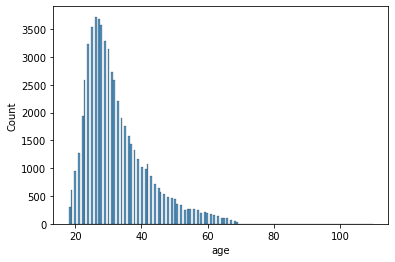

In [ ]:
sns.histplot(x=df['age'])

In [ ]:
df[['age']].describe()

,age
count,59946.000000
mean,32.340290
std,9.452779
min,18.000000
25%,26.000000
50%,30.000000
75%,37.000000
max,110.000000


[Text(0.5, 1.0, 'Sex count')]

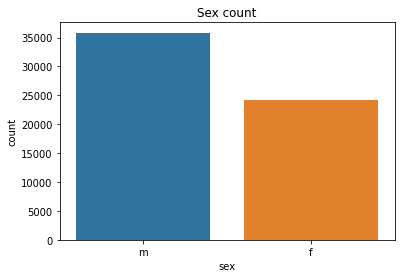

In [ ]:
sns.countplot(x=df['sex']).set(title="Sex count")

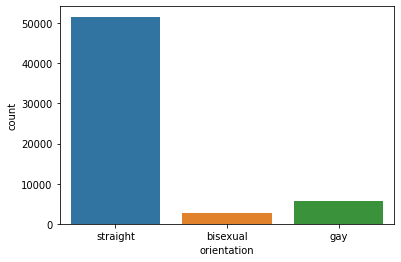

In [ ]:
sns.countplot(x=df['orientation'])

[Text(0.5, 1.0, 'Orientation count per sex')]

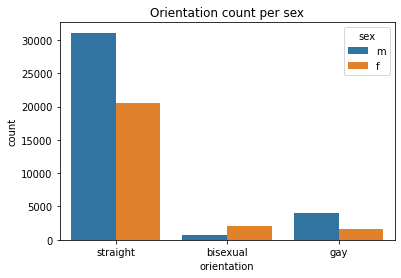

In [ ]:
sns.countplot(data=df, 
              x='orientation', 
              hue='sex').set(title="Orientation count per sex")

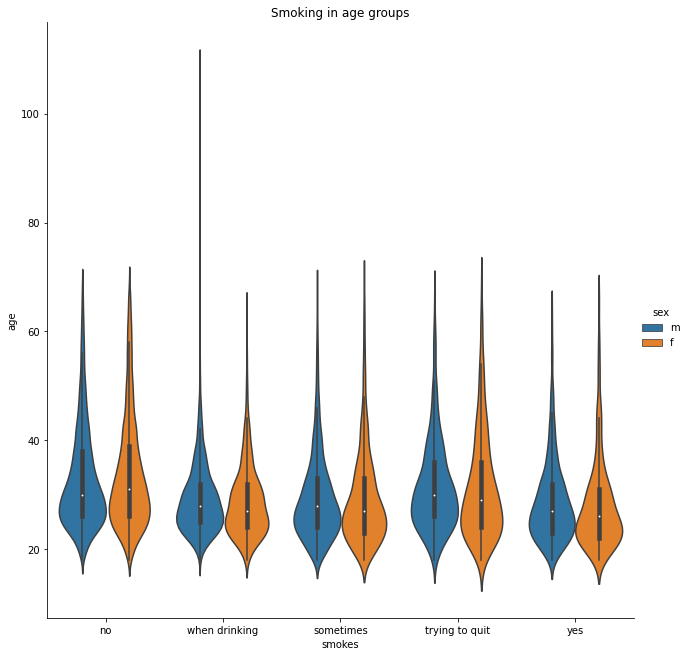

In [ ]:
sns.catplot(data=df, 
            x='smokes', 
            y='age', 
            hue='sex', 
            kind='violin', 
            order=['no', 'when drinking', 'sometimes', 'trying to quit', 'yes'], 
            height=9,
            ).set(title="Smoking in age groups")

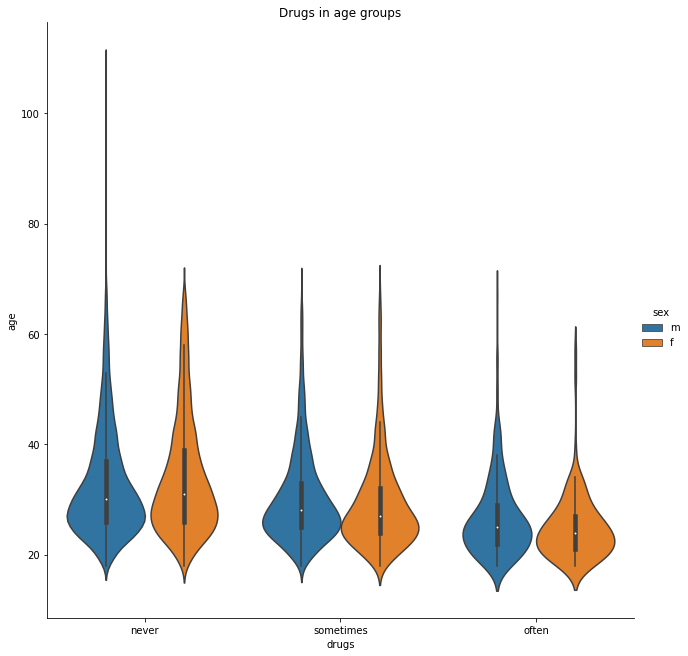

In [ ]:
sns.catplot(data=df, 
            x='drugs', 
            y='age', 
            hue='sex', 
            kind='violin', 
            order=['never', 'sometimes', 'often'], 
            height=9,
            ).set(title="Drugs in age groups")

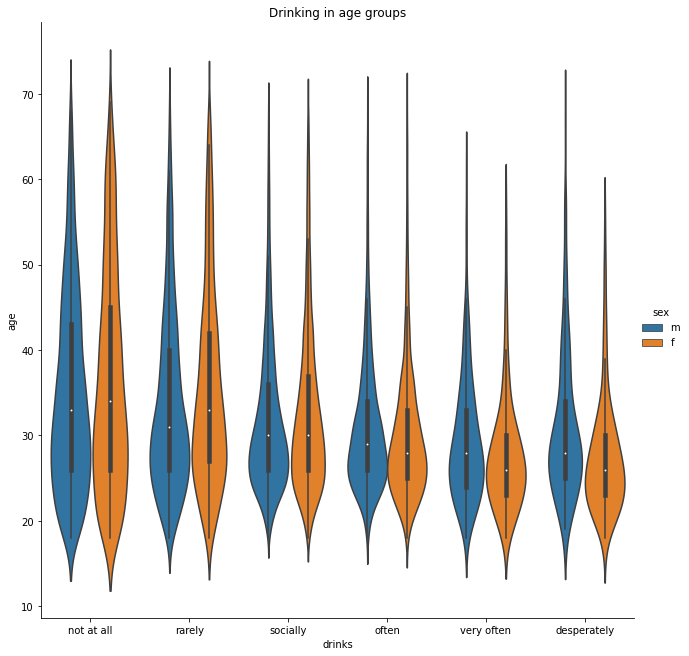

In [ ]:
sns.catplot(data=df, 
            x='drinks', 
            y='age', 
            hue='sex', 
            kind='violin', 
            order=['not at all', 'rarely', 'socially', 'often', 'very often', 'desperately'], 
            height=9,
            ).set(title="Drinking in age groups")

In [ ]:
# imputing danych xgboostem
# labelencoder tam gdzie jest hierarchia, onehot tam gdzie nie ma
# nie brac tych essay... kolumn do X
# potem clustering: k-means i dbscan?
# https://towardsdatascience.com/unsupervised-classification-project-building-a-movie-recommender-with-clustering-analysis-and-4bab0738efe6
# miceforest? https://pypi.org/project/miceforest/